We're conducting a review to assess the condition of cars stored in our warehouse. This overview aims to provide insights into the current state of the inventory.

# Data prepration

In [2]:
# import required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\saeed\AppData\Local\Temp\ipykernel_11492\2048123809.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# reading the data

data = pd.read_csv("CAR_SALE_DATA.csv")
data = pd.DataFrame(data).dropna()
data.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


In [4]:
# insert all values of "Brand" column to ndarry 
brand = data["Engine Type"].to_numpy()

# clear repetitive values of brand ndarry
brand = np.unique(brand)

brand

array(['Diesel', 'Gas', 'Other', 'Petrol'], dtype=object)

In [5]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


# Mode of Prices per Brand

In [6]:
brand_price = data.groupby('Brand')['Price'].apply(lambda x: x.mode().iloc[0]).reset_index()
brand_price.sort_values(by="Price")

,Brand,Price
0,Audi,3500.0
2,Mercedes-Benz,5500.0
1,BMW,6500.0
6,Volkswagen,9000.0
3,Mitsubishi,9200.0
4,Renault,10500.0
5,Toyota,12500.0


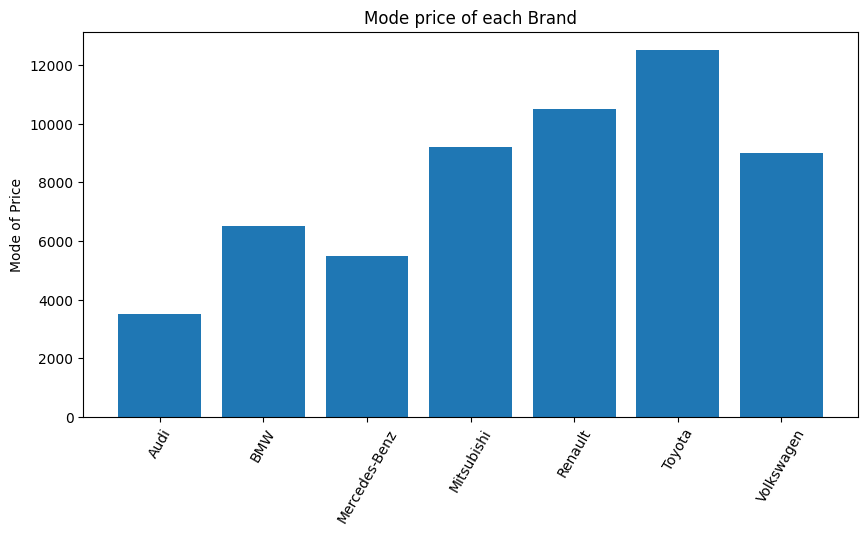

In [7]:


plt.figure(figsize=(10,5))
plt.bar(x=brand_price["Brand"], height=brand_price["Price"])

plt.ylabel('Mode of Price')
plt.title('Mode price of each Brand')
plt.xticks(rotation = 60)
plt.show()





# Number of cars per brand

In [8]:
total_brand = data.groupby(by="Brand", as_index=True).agg({"Brand":"count"})
total_brand

,Brand
Brand,
Audi,420
BMW,640
Mercedes-Benz,823
Mitsubishi,307
Renault,445
Toyota,510
Volkswagen,880


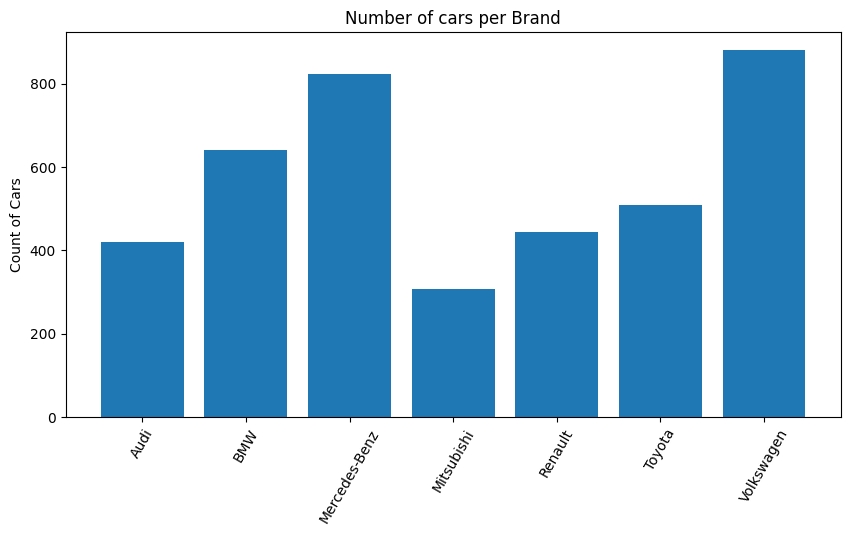

In [9]:


plt.figure(figsize=(10, 5))
plt.bar(total_brand.index, total_brand["Brand"])

plt.ylabel('Count of Cars')
plt.title('Number of cars per Brand')
plt.xticks(rotation = 60)


plt.show()



# Number of Cars per Year

In [10]:
total_cars_year = data.groupby(by="Year", as_index=True).agg({"Brand":"count"})
total_cars_year[:3]

,Brand
Year,
1969,1
1978,2
1979,3


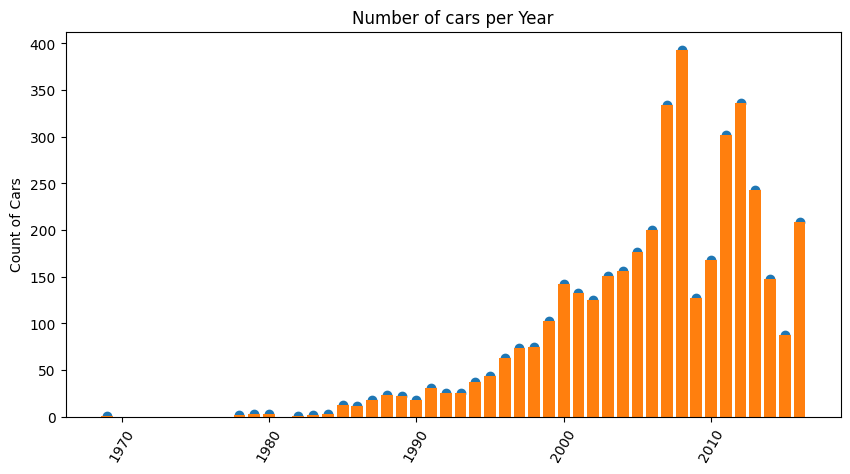

In [11]:

plt.figure(figsize=(10,5))
plt.scatter(total_cars_year.index, total_cars_year["Brand"])
plt.bar(total_cars_year.index, total_cars_year["Brand"])

plt.ylabel('Count of Cars')
plt.title('Number of cars per Year')
plt.xticks(rotation = 60)


plt.show()


This dataset can assist us in determining fair and reasonable prices for future warehouse cars. Utilizing regression analysis, we can establish a pricing model that accurately reflects market trends and factors influencing car prices.

# Conclusion

After analyzing the exploratory data, we can consider several approaches for selecting a brand, time interval, and mileage interval:

1. Toyota emerges as the brand associated with the highest prices, as indicated by the mode of prices.
2. The majority of cars in storage are from Volkswagen and Mercedes-Benz brands, suggesting a notable presence of these manufacturers.
3. Cars from the years 2008, 2012, 2007, and 2011 dominate the inventory, indicating a concentration within these specific years.